### 2022년 10월 서울(구) 평균 미세먼지,초미세먼지



#### 2022년 10월 서울을 OO구 단위로 나누어 미세먼지와 초미세먼지 평균치 데이터를 뽑음
#### y=nx그래프 추세선을 통해 미세먼지와 초미세먼지 사이의 상관관계를 비교
### 분석 :
#### 1. 동작대로 중앙차로 쪽 초미세먼지의 농도가 가장 높지만 구로구의 미세먼지의 농도가 가장 높다.
#### -> 동작대로 중앙차로는 자동차 배출가스에 취약한 지역이기에 초미세먼지가 많고, 구로구는 공장이 많아 미세먼지의 농도가 많음
#### 2. 시흥대로는 미세먼지, 초미세먼지로부터 가장 청정구역이다. (은평구, 서대문구 또한 대체적으로 청정구역)
#### -> 주변에 천(川)이 있고, 공원이 많아 자동차 배출가스에 강한 지역이기에 상대적으로 청정구역임 (은평구, 서대문구 또한 비슷)
##### 3. 대부분 미세먼지와 초미세먼지의 농도는 비례한다.

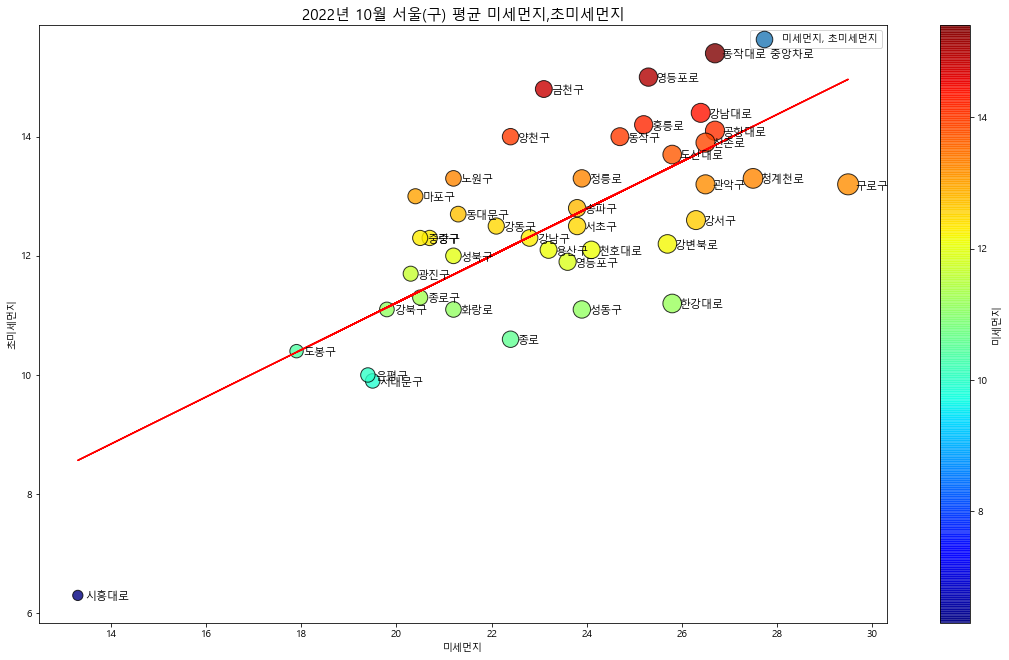

,pm10,pm2.5,지역
0,22.8,12.3,강남구
1,22.1,12.5,강동구
2,19.8,11.1,강북구
3,26.3,12.6,강서구
4,26.5,13.2,관악구
5,20.3,11.7,광진구
6,29.5,13.2,구로구
7,23.1,14.8,금천구
8,21.2,13.3,노원구
9,17.9,10.4,도봉구


In [94]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

f=open("./data/dust_backup.csv")
data=csv.reader(f)
next(data)

name = []
value = []
sum_PM10_list = []
sum_PM2_list = []

for row in data:
    if row[0] == "미세먼지(PM10)" and row[3] == "2022년10월" and "서울" in row[2]:
        name.append(row[2].split("]")[1])
        sum_PM10 = 0
        for i in range(4,len(row)):
            if row[i] == "":
                row[i] = 0
            sum_PM10 = sum_PM10 + int(row[i])            
        sum_PM10 = round(sum_PM10/len(row),1)
        sum_PM10_list.append(sum_PM10)
    if row[0] == "초미세먼지(PM2.5)" and row[3] == "2022년10월" and "서울" in row[2]:
        sum_PM2 = 0
        for i in range(4,len(row)):
            if row[i] == "":
                row[i] = 0
            sum_PM2 = sum_PM2 + int(row[i])            
        sum_PM2 = round(sum_PM2/len(row),1)
        sum_PM2_list.append(sum_PM2)
                
# print("2022년 10월 서울 미세먼지 평균 농도")
# for i in range(0,len(name)):
#     print(name[i] +" - "+ str(sum_PM10_list[i]))
    
# print("2022년 10월 서울 초미세먼지 평균 농도")
# for i in range(0,len(name)):
#     print(name[i] +" - "+ str(sum_PM2_list[i]))        

df = pd.DataFrame({"pm10":sum_PM10_list,"pm2.5":sum_PM2_list,"지역":name})
plt.figure(figsize=(19, 11))
plt.rc("font", family="Malgun Gothic")
plt.title("2022년 10월 서울(구) 평균 미세먼지,초미세먼지", fontsize=15)
plt.scatter(df["pm10"],df["pm2.5"],s=df["pm10"]**1.8, c=df["pm2.5"],label="미세먼지, 초미세먼지", edgecolors='black',alpha=0.8, cmap="jet")
plt.legend(loc="best")
plt.colorbar(label="미세먼지")
plt.xlabel("미세먼지")
plt.ylabel("초미세먼지")
# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.

x = df['pm10']
y = df['pm2.5']

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
plt.plot(x,p(x),"r")

#레이블 꾸미기
for i in range(len(df)): # 행 개수만큼 순회
        row = df.iloc[i] # 한 행씩 꺼내기
        name = row['지역'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x+0.15, y-0.08, name, color = 'black', fontsize =11) # x, y좌표 및 색깔, 글자 크기 수정
        
plt.show()
df

### 전국 2022년 10월 평균 미세먼지, 초미세먼지

#### 2022년 10월 기준, 지역시 별로 평균 미세먼지와 초미세먼지를 각 x,y축으로 표현하고 각 지역마다 거주하는 인구수를 원의 크기로 표현하였다.
#### 인구수가 많으면 교통체증도 많아질것이라고 생각해 인구수도 분석 데이터에 포함하게 됨.
#### 추세선을 통해 초미세먼지와 미세먼지 사이의 상관관계를 비교해봄.
### 분석 :
#### 1. 10월에는 가을이기에 오호츠크해 기단의 영향으로 대부분 미세먼지/초미세먼지의 값이 낮다.
#### 2. 10월엔 북동풍이 불어 태백산맥의 오른쪽 지역들(강원 ~ 부산)은 상대적으로 미세먼지/초미세먼지로부터 청정구역이다.
#### 3. 반면 서울, 경기에 거주중인 인구수가 많고 공장과 교통체증으로 미세먼지/초미세먼지 평균이상 값으로 대기상태가 좋지않다.
##### ->북동풍의 영향으로 서울과 경기 아래 주변 지역들(충남~전북)이 더 큰 피해를 받게 되었다. 
###### -->충남이 가장 큰 피해를 입게되고, 그 아래인 전북은 충남보단 작은 피해를 입음 (기단의 영향을 받았지만 세기가 강하지않아 충남이 가장 큰 피해를 받음)

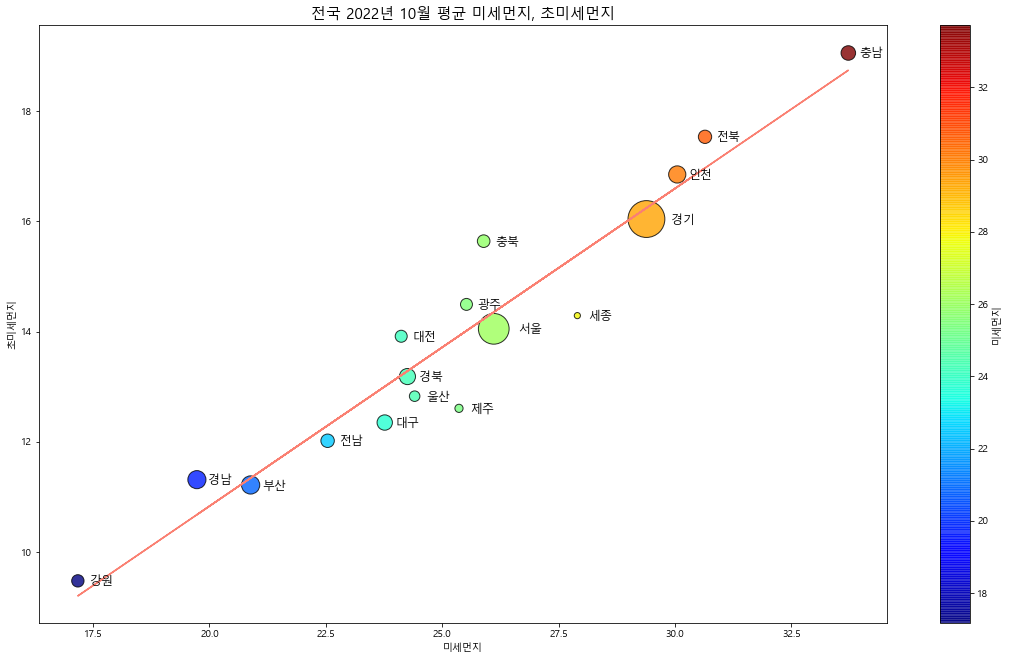

,pm10,pm2.5,인구수(만명),측정소명
0,26.107258,14.050806,943,서울
1,29.387097,16.042581,1358,경기
2,30.049236,16.851443,296,인천
3,17.172043,9.477599,153,강원
4,33.724516,19.055484,212,충남
5,24.119107,13.915633,144,대전
6,25.890518,15.641251,159,충북
7,20.883871,11.217512,332,부산
8,24.407625,12.828446,111,울산
9,23.764977,12.350230,236,대구


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("./data/dust_backup.csv", encoding='cp949')
df_population = pd.read_csv("./data/Korea_population.csv", encoding='cp949')
#df.head()
#df
# 새로운 데이터프레임 만들기
df_cp = df.copy()
#df_cp.head()
df_edit = pd.DataFrame({"측정소명":["서울","경기","인천","강원","충남","대전","충북","부산","울산","대구","경북","경남","전남","광주","전북","제주","세종"],
                        "pm10":[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                        "pm2.5":[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                       "인구수(만명)":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
df_cp = df_cp.fillna(0.0) #df_cp의 NaN값 0.0으로 바꾸기
df_cp["mean"] = df_cp.loc[:,"1일":].mean(axis=1) #각 행에 대한 평균값
# df_cp.where(df_cp.측정 == "미세먼지(PM10)" and df_cp.측정날짜=="2022년 10월"and df_cp.측정소명.split(" ")[0].split("[")[1] == "서울", df_edit.loc[0,"pm10"]=df_edit.loc[0,"pm10"] + df_cp.mean)
# df_cp
name = ["서울","경기","인천","강원","충남","대전","충북","부산","울산","대구","경북","경남","전남","광주","전북","제주","세종"]
num = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i, row in df_cp.iterrows() :
    #측정소명이 "서울" and 측정이 "미세먼지(PM10)" and 측정날짜 "2022년 10월"인 경우 pm10의 값을 더하기
    for x in range(0,17): #미세먼지
        if df_cp.at[i, "측정소명"].split(" ")[0].split("[")[1] == name[x] and df_cp.at[i,"측정"]=="미세먼지(PM10)" and df_cp.at[i,"측정날짜"]=="2022년10월":
            df_edit.at[x,"pm10"] = df_edit.at[x,"pm10"] + df_cp.at[i,"mean"] #지역별 df 업데이트(sum)
            num[x] = num[x] + 1 #지역별 데이터개수 세서 평균값내기        
    for x in range(0,17): #초미세먼지
        if df_cp.at[i, "측정소명"].split(" ")[0].split("[")[1] == name[x] and df_cp.at[i,"측정"]=="초미세먼지(PM2.5)" and df_cp.at[i,"측정날짜"]=="2022년10월":
            df_edit.at[x,"pm2.5"] = df_edit.at[x,"pm2.5"] + df_cp.at[i,"mean"] #지역별 df 업데이트(sum)
            
for i in range(0,17): #지역별 평균값 계산
    df_edit.at[i,"pm10"] = df_edit.at[i,"pm10"] / num[i] #미세먼지
    df_edit.at[i,"pm2.5"] = df_edit.at[i,"pm2.5"] / num[i] #초미세먼지
    df_edit.at[i,"인구수(만명)"] = df_population.at[i,"인구수"]/10000
#     df_edit.at[i,"인구수(만명)"] = math.sqrt(df_population.at[i,"인구수"])/2
    
plt.figure(figsize=(19, 11))
plt.rc("font", family="Malgun Gothic")
plt.title("전국 2022년 10월 평균 미세먼지, 초미세먼지", fontsize=15)
plt.scatter(df_edit["pm10"],df_edit["pm2.5"],s=df_edit["인구수(만명)"], c=df_edit["pm10"], edgecolors='black',alpha=0.8, cmap="jet")
plt.colorbar(label="미세먼지")
plt.xlabel("미세먼지")
plt.ylabel("초미세먼지")

x = df_edit['pm10']
y = df_edit['pm2.5']

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
plt.plot(x,p(x),color="salmon")

#레이블 꾸미기
for i in range(len(df_edit)): # 행 개수만큼 순회
    if i==0 or i==1:
        row = df_edit.iloc[i] # 한 행씩 꺼내기
        name = row['측정소명'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x+0.52, y-0.08, name, color = 'black', fontsize = 12) # x, y좌표 및 색깔, 글자 크기 수정
    else:
        row = df_edit.iloc[i] # 한 행씩 꺼내기
        name = row['측정소명'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x+0.24, y-0.08, name, color = 'black', fontsize = 12) # x, y좌표 및 색깔, 글자 크기 수정
        

plt.show()
df_edit

### 2021년 서울(전체) 봄, 여름, 가을, 겨울 평균 미세먼지,초미세먼지

#### 2021년 서울(전체) 평균치를 각 계절마다 미세먼지와 초미세먼지의 데이터을 비교, 분석
## 분석:
#### 1. 전체적으로 봄, 겨울에 미세먼지와 초미세먼지의 수치가 높다.
##### -> 봄 : 중국에서 양쯔강기단(남서풍)으로 황사 + 미세먼지 + 초미세먼지의 영향이 가장 커, 3월의 대기질이 가장 좋지 않다.
##### -> 겨울 : 러시아쪽에서 시작되며 중국으로 거쳐 불어오는 시베리아기단(북서풍)의 영향으로 미세먼지 + 초미세먼지의 농도가 봄보단 적지만 수치가 큼
#### 2. 전체적으로 가을, 여름에 미세먼지와 초미세먼지의 수치가 낮다.
##### -> 가을 : 오호츠크해기단(북동풍)으로 대부분 다른 계절보다 미세먼지/초미세먼지의 농도가 작다.
##### -> 여름 : 북태평양기단(남서풍) 으로 평균치로 봤을때 다른 계절보다 미세먼지/초미세먼지의 농도가 가장 작다.
#### 2.1 왜 11월은 높을까 ?
##### ->지구온난화로인해 시베리아기단이 오호츠크해기단보다 세기가 강해져 가을에서 겨울로 계절이 변화할때 영향을 크게 받게 됨
#### 3. 대부분 미세먼지와 초미세먼지의 수치는 비례한다.

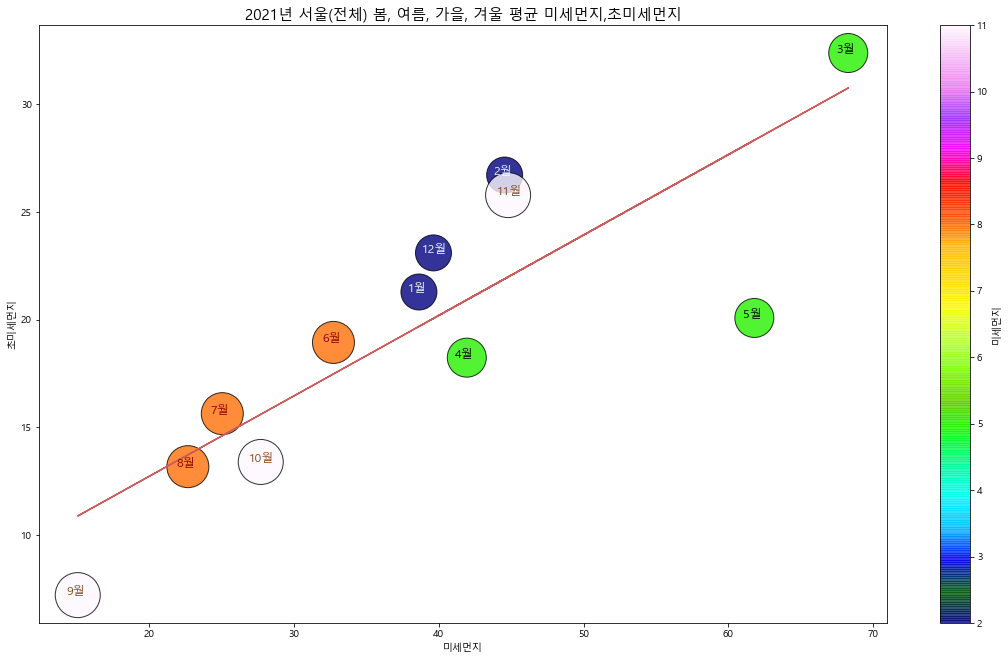

,month,pm10,pm2.5,weather
0,1월,38.620161,21.290323,2
1,2월,44.542742,26.720161,2
2,3월,68.283871,32.385484,5
3,4월,41.927419,18.242742,5
4,5월,61.794355,20.084677,5
5,6월,32.714516,18.949194,8
6,7월,25.034677,15.642742,8
7,8월,22.653226,13.182258,8
8,9월,15.046774,7.218548,11
9,10월,27.690323,13.400000,11


In [90]:
#서울인 모든 구역 평균값을 내서 1,2,3,4,5,6,7,8,9,10,11,12월 인덱스로 계절에따른 미세먼지와 초미세먼지 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("./data/dust_backup.csv", encoding='cp949')
# 새로운 데이터프레임 만들기
df_seoul = df.copy()
#df_cp.head()
df_edit = pd.DataFrame({"pm10":[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                        "pm2.5":[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                        "month":["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"],
                        "weather":[2,2,5,5,5,8,8,8,11,11,11,2]})
df_seoul = df_seoul.fillna(0.0) #df_cp의 NaN값 0.0으로 바꾸기
df_seoul["mean"] = df_seoul.loc[:,"1일":].mean(axis=1) #각 행에 대한 평균값

num = [0,0,0,0,0,0,0,0,0,0,0,0]

for i, row in df_seoul.iterrows() :
    #측정소명이 "서울" and 측정이 "미세먼지(PM10)" and 측정날짜 "2021년"인 경우 pm10의 값을 더하기
    for x in range(0,12): #미세먼지
        if df_seoul.at[i, "측정소명"].split(" ")[0].split("[")[1] == "서울" and df_seoul.at[i,"측정"]=="미세먼지(PM10)" and df_seoul.at[i,"측정날짜"]=="2021년"+str(x+1)+"월" :
            df_edit.at[x,"pm10"] = df_edit.at[x,"pm10"] + df_seoul.at[i,"mean"] #지역별 df 업데이트(sum)
            num[x] = num[x] + 1 #지역별 데이터개수 세서 평균값내기(12월이니 모두 같은 12개의 num값)
    for x in range(0,12): #초미세먼지
        if df_seoul.at[i, "측정소명"].split(" ")[0].split("[")[1] == "서울" and df_seoul.at[i,"측정"]=="초미세먼지(PM2.5)" and df_seoul.at[i,"측정날짜"]=="2021년"+str(x+1)+"월":
            df_edit.at[x,"pm2.5"] = df_edit.at[x,"pm2.5"] + df_seoul.at[i,"mean"] #지역별 df 업데이트(sum)
            
for i in range(0,12): #지역별 평균값 계산
    df_edit.at[i,"pm10"] = df_edit.at[i,"pm10"] / num[0] #미세먼지
    df_edit.at[i,"pm2.5"] = df_edit.at[i,"pm2.5"] / num[0] #초미세먼지
    
plt.figure(figsize=(19, 11))
plt.rc("font", family="Malgun Gothic")
plt.title("2021년 서울(전체) 봄, 여름, 가을, 겨울 평균 미세먼지,초미세먼지", fontsize=15)
plt.scatter(df_edit["pm10"],df_edit["pm2.5"],s=(df_edit["weather"]+34)**2, c=df_edit["weather"], edgecolors='black',alpha=0.8, cmap="gist_ncar")
plt.colorbar(label="미세먼지")
plt.xlabel("미세먼지")
plt.ylabel("초미세먼지")

x = df_edit['pm10']
y = df_edit['pm2.5']

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
plt.plot(x,p(x),color="indianred")

#레이블 꾸미기
for i in range(len(df_edit)): # 행 개수만큼 순회
    if i==0 or i==1 or i ==11:
        row = df_edit.iloc[i] # 한 행씩 꺼내기
        name = row['month'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x - 0.8, y, name, color = 'azure', fontsize = 12) # x, y좌표 및 색깔, 글자 크기 수정
        
    if i==2 or i==3 or i ==4:
        row = df_edit.iloc[i] # 한 행씩 꺼내기
        name = row['month'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x - 0.8, y, name, color = 'black', fontsize = 12) # x, y좌표 및 색깔, 글자 크기 수정

    if i==5 or i==6 or i ==7:
        row = df_edit.iloc[i] # 한 행씩 꺼내기
        name = row['month'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x - 0.8, y, name, color = 'darkred', fontsize = 12) # x, y좌표 및 색깔, 글자 크기 수정
        
    if i==8 or i==9 or i ==10:
        row = df_edit.iloc[i] # 한 행씩 꺼내기
        name = row['month'] # 이름이 저장된 열
        x = row['pm10'] # x좌표가 저장된 열
        y = row['pm2.5'] # y좌표가 저장된 열
        plt.text(x - 0.8, y, name, color = 'saddlebrown', fontsize = 12) # x, y좌표 및 색깔, 글자 크기 수정

plt.show()
# df_seoul
df_edit